# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

(60000, 784)


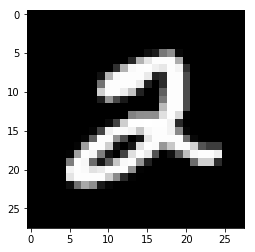

In [7]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
print(mnist.train.images.shape)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name = 'inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name = 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name ='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6963
Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6849
Epoch: 1/20... Training loss: 0.6804
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6698
Epoch: 1/20... Training loss: 0.6627
Epoch: 1/20... Training loss: 0.6550
Epoch: 1/20... Training loss: 0.6448
Epoch: 1/20... Training loss: 0.6343
Epoch: 1/20... Training loss: 0.6226
Epoch: 1/20... Training loss: 0.6085
Epoch: 1/20... Training loss: 0.5940
Epoch: 1/20... Training loss: 0.5797
Epoch: 1/20... Training loss: 0.5612
Epoch: 1/20... Training loss: 0.5425
Epoch: 1/20... Training loss: 0.5283
Epoch: 1/20... Training loss: 0.5086
Epoch: 1/20... Training loss: 0.4938
Epoch: 1/20... Training loss: 0.4738
Epoch: 1/20... Training loss: 0.4566
Epoch: 1/20... Training loss: 0.4386
Epoch: 1/20... Training loss: 0.4223
Epoch: 1/20... Training loss: 0.4081
Epoch: 1/20... Training loss: 0.3973
Epoch: 1/20... Training loss: 0.3860
E

Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1781
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1888
E

Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1573
E

Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1315
E

Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1265
E

Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1155
E

Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1118
E

Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1045
E

Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1014
E

Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0923
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0974
E

Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0990
E

Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.1012
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0992
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0888
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0886
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0877
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0995
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

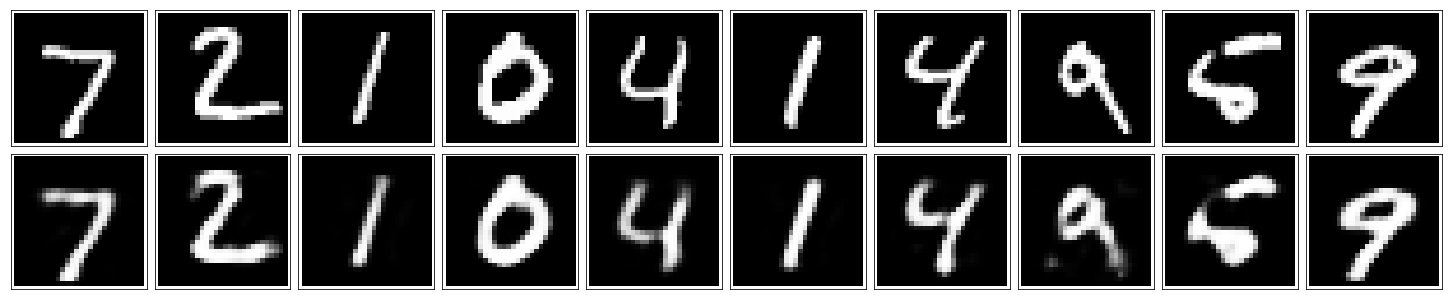

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.